In [82]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

In [79]:

data = pd.read_csv(r'C:\Users\dell\Downloads\xAPI-Edu-Data.csv')
# Any results you write to the current directory are saved as output.
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [55]:
cd C:\Users\dell\Downloads

C:\Users\dell\Downloads


In [56]:
pwd


'C:\\Users\\dell\\Downloads'

In [74]:
pd.read_csv('xAPI-Edu-Data.csv')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [81]:
data.describe()


,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [83]:
data = pd.read_csv(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')
# Any results you write to the current directory are saved as output.
data.head()

,Timestamp,Email Address,FIRST NAME,LAST NAME,BRANCH,YEAR,First Semester status,Enter pointer / no. of kt,First Semester status.1,SECOND Semester status,...,Enter FOURTH SEM pointer or no. of kt as per above choices.,Enter FIFTH SEM pointer or no. of kt as per above choices.,Enter SIXTH SEM pointer or no. of kt as per above choices.,Enter SEVENTH SEM pointer or no. of kt as per above choices.,ARE YOU A PART OF ANY COMMITTEE,Please select the committee you are part of,Enter the Designations here,HAVE YOU WON ANY COMPETITIONS,ENTER THE TYPE OF COMPETITION,ENTER THE DETAILS
0,3/15/2019 15:59:48,sapatil655@gmail.com,Srushti,Devesh,INSTRU,BE,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,YES,Students Council,Dcs,Yes,CULTURAL COMPETITION,Singing
1,3/15/2019 16:04:14,sapatil655@gmail.com,Srushti,Ashok,EXTC,SE,NaN,NaN,SUCCESSFUL,SUCCESSFUL,...,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN
2,3/15/2019 16:05:08,sapatil655@gmail.com,Sanjeev,Sharma,INSTRU,TE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN
3,3/15/2019 16:05:59,sapatil655@gmail.com,Bakakak,Hsjsjs,CIVIL,FE,SUCCESSFUL,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,YES,Students Council,Zwc,No,NaN,NaN
4,3/15/2019 16:11:44,poojanayaka98@gmail.com,Pooja,Nayaka,COMPUTER,TE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN


In [84]:
cd C:\Users\dell\Downloads

C:\Users\dell\Downloads


In [85]:
pwd

'C:\\Users\\dell\\Downloads'

In [86]:
pd.read_csv('NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')

,Timestamp,Email Address,FIRST NAME,LAST NAME,BRANCH,YEAR,First Semester status,Enter pointer / no. of kt,First Semester status.1,SECOND Semester status,...,Enter FOURTH SEM pointer or no. of kt as per above choices.,Enter FIFTH SEM pointer or no. of kt as per above choices.,Enter SIXTH SEM pointer or no. of kt as per above choices.,Enter SEVENTH SEM pointer or no. of kt as per above choices.,ARE YOU A PART OF ANY COMMITTEE,Please select the committee you are part of,Enter the Designations here,HAVE YOU WON ANY COMPETITIONS,ENTER THE TYPE OF COMPETITION,ENTER THE DETAILS
0,3/15/2019 15:59:48,sapatil655@gmail.com,Srushti,Devesh,INSTRU,BE,NaN,NaN,NaN,NaN,...,8.00,8.00,8.00,8.00,YES,Students Council,Dcs,Yes,CULTURAL COMPETITION,Singing
1,3/15/2019 16:04:14,sapatil655@gmail.com,Srushti,Ashok,EXTC,SE,NaN,NaN,SUCCESSFUL,SUCCESSFUL,...,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN
2,3/15/2019 16:05:08,sapatil655@gmail.com,Sanjeev,Sharma,INSTRU,TE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN
3,3/15/2019 16:05:59,sapatil655@gmail.com,Bakakak,Hsjsjs,CIVIL,FE,SUCCESSFUL,7.00,NaN,NaN,...,NaN,NaN,NaN,NaN,YES,Students Council,Zwc,No,NaN,NaN
4,3/15/2019 16:11:44,poojanayaka98@gmail.com,Pooja,Nayaka,COMPUTER,TE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN
5,3/15/2019 16:12:52,pankajdhanve123@gmail.com,Pankaj,Dhanve,COMPUTER,TE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN
6,3/15/2019 16:13:05,prajaktameshram3@gmail.com,Prajakta,Meshram,COMPUTER,TE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN
7,3/15/2019 16:13:46,rahul.gaikwad247@gmail.com,Rahul,Gaikwad,COMPUTER,TE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN
8,3/15/2019 16:17:20,thevhiteshm17@gmail.com,Vhitesh,More,COMPUTER,TE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,YES,Students Council,Event head,No,NaN,NaN
9,3/15/2019 16:17:31,juneethp@gmail.com,Juneeth,Panjri,COMPUTER,TE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,YES,"Students Council, Udaan",Deputy Taskforce head,No,NaN,NaN


In [87]:
data.describe()

,Enter pointer / no. of kt,Enter FIRST SEM pointer /no. of kt,Enter SECOND SEM pointer / no. of kt,Enter THIRD SEM pointer / no. of kt,Enter FIRST SEM pointer /no. of kt as per above choices.,Enter SECOND SEM pointer / no. of kt as per above choices.,Enter THIRD SEM pointer / no. of kt as per above choices.,Enter FIFTH SEM pointer / no. of kt as per above choices.,Enter FIRST SEM pointer or no. of kt as per above choices.,Enter SECOND SEM pointer or no. of kt as per above choices.,Enter THIRD SEM pointer or no. of kt as per above choices.,Enter FOURTH SEM pointer or no. of kt as per above choices.,Enter FIFTH SEM pointer or no. of kt as per above choices.,Enter SIXTH SEM pointer or no. of kt as per above choices.,Enter SEVENTH SEM pointer or no. of kt as per above choices.
count,155.000000,242.000000,242.000000,242.000000,196.000000,196.000000,196.000000,196.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,5.013677,5.219132,5.216488,5.576446,4.593673,4.688878,6.732449,6.617857,6.456476,6.426190,7.436286,7.560095,8.154952,7.968190,7.868952
std,2.728580,3.120944,3.238162,2.819967,3.465469,3.529284,1.563026,2.051540,2.624683,2.736417,1.538269,1.549357,1.514441,1.277292,1.487340
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,0.000000,0.000000,5.872500,6.322500,6.130000,6.220000,6.710000,6.790000,7.580000,7.300000,7.480000
50%,6.000000,6.640000,6.695000,6.605000,6.110000,6.345000,6.805000,7.150000,7.220000,7.330000,7.500000,7.710000,8.380000,8.000000,8.070000
75%,7.385000,7.500000,7.570000,7.612500,7.302500,7.520000,7.700000,7.827500,8.000000,8.110000,8.430000,8.630000,9.140000,8.720000,8.600000
max,9.260000,9.440000,9.740000,10.000000,10.000000,10.000000,9.850000,9.620000,9.630000,9.410000,10.000000,10.000000,10.000000,9.960000,9.850000


In [92]:
import csv with
open("NEW STUDENT DETAILS (Responses) - Form Responses 1.csv") as file1, open("masterlist.csv") as file2,
open("stopwords.csv") as file3, open("output.csv", "wb+") as file4:
        writer = csv.writer(file4)
        key_words = [word.strip() for word in file2.readlines()]
        stop_words = [' also ', ' although ', ' always ', ' and ', ' any ', ' are ', ' as ', ' at ',\
              ' around ', ' be ', ' by ', ' for ', ' from ', ' has ', ' on ', ' that ', ' were ', ' will ',\
              ' with ' ' can ', ' cannot ', ' if ', ' it ', ' the ', ' there ', ' which ', ' in ', ' is ',\
              ' its ', ' me ', ' of ', ' was ', ' then ', ' with ', ' a ', ' an ', ' to ', ' to ', ' when ',\
              ' however ', '"', ',', '.', '-', '?', '!', '(', ')']
        for row in file1:
            row = row.strip()
            row = row.lower()
            for stopword in stop_words:
                if stopword in row:
                    row = row.replace(stopword," ")
            for key in key_words:
                if key in row:
                    writer.writerow([key, row])
                    break

SyntaxError: invalid syntax (<ipython-input-92-6cbdd64201b2>, line 1)

In [ ]:
import csv
from nltk import PorterStemmer
port = PorterStemmer()

with open('NEW STUDENT DETAILS (Responses) - Form Responses 1.csv', 'rb') as f:
    reader = csv.reader(f)
    for row in reader:
        print(port.stem(row))

In [94]:
print(data.shape)


(698, 44)


In [95]:
data.columns

Index(['Timestamp', 'Email Address', 'FIRST NAME', 'LAST NAME', 'BRANCH ',
       'YEAR', 'First Semester status', 'Enter pointer / no. of kt ',
       'First Semester status.1', 'SECOND Semester status',
       'THIRD Semester status', 'Enter  FIRST SEM pointer /no. of kt ',
       'Enter  SECOND SEM pointer / no. of kt ',
       'Enter  THIRD SEM pointer / no. of kt ', 'First Semester status.2',
       'SECOND Semester status.1', 'THIRD Semester status.1',
       'FOURTH Semester status', 'FIFTH Semester status',
       'Enter  FIRST SEM pointer /no. of kt as per above choices.',
       'Enter  SECOND SEM pointer / no. of kt as per above choices.',
       'Enter  THIRD SEM pointer / no. of kt as per above choices.',
       'Enter  FOURTH SEM pointer / no. of kt as per above choices.',
       'Enter  FIFTH SEM pointer / no. of kt as per above choices.',
       'First Semester status.3', 'SECOND Semester status.2',
       'THIRD Semester status.2', 'FOURTH Semester status.1',
       'F

In [96]:
data.isnull()


,Timestamp,Email Address,FIRST NAME,LAST NAME,BRANCH,YEAR,First Semester status,Enter pointer / no. of kt,First Semester status.1,SECOND Semester status,...,Enter FOURTH SEM pointer or no. of kt as per above choices.,Enter FIFTH SEM pointer or no. of kt as per above choices.,Enter SIXTH SEM pointer or no. of kt as per above choices.,Enter SEVENTH SEM pointer or no. of kt as per above choices.,ARE YOU A PART OF ANY COMMITTEE,Please select the committee you are part of,Enter the Designations here,HAVE YOU WON ANY COMPETITIONS,ENTER THE TYPE OF COMPETITION,ENTER THE DETAILS
0,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,False,True,True,False,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,True,True,False,True,True
3,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,False,False,False,False,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,True,True,False,True,True
5,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,True,True,False,True,True
6,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,True,True,False,True,True
7,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,True,True,False,True,True
8,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True
9,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True


In [97]:
data.isnull().sum()


Timestamp                                                          0
Email Address                                                      0
FIRST NAME                                                         0
LAST NAME                                                          0
BRANCH                                                             0
YEAR                                                               0
First Semester status                                            543
Enter pointer / no. of kt                                        543
First Semester status.1                                          456
SECOND Semester status                                           456
THIRD Semester status                                            456
Enter  FIRST SEM pointer /no. of kt                              456
Enter  SECOND SEM pointer / no. of kt                            456
Enter  THIRD SEM pointer / no. of kt                             456
First Semester status.2           

In [98]:
data.sum()

Timestamp                                                        3/15/2019 15:59:483/15/2019 16:04:143/15/2019 ...
Email Address                                                    sapatil655@gmail.comsapatil655@gmail.comsapati...
FIRST NAME                                                       SrushtiSrushtiSanjeev BakakakPoojaPankajPrajak...
LAST NAME                                                        DeveshAshokSharmaHsjsjsNayakaDhanveMeshram Gai...
BRANCH                                                           INSTRUEXTCINSTRUCIVILCOMPUTERCOMPUTERCOMPUTERC...
YEAR                                                             BESETEFETETETETETETETETETETETETETESETESETETESE...
Enter pointer / no. of kt                                                                                   777.12
Enter  FIRST SEM pointer /no. of kt                                                                        1263.03
Enter  SECOND SEM pointer / no. of kt                                           

In [100]:
data['YEAR'].value_counts()


SE    242
TE    196
FE    155
BE    105
Name: YEAR, dtype: int64

Percentage SE    0.346705
TE    0.280802
FE    0.222063
BE    0.150430
Name: YEAR, dtype: float64


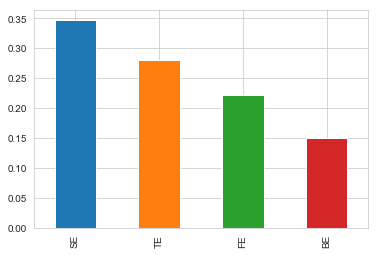

In [101]:
print('Percentage',data.YEAR.value_counts(normalize=True))
data.YEAR.value_counts(normalize=True).plot(kind='bar')

In [102]:
data['Enter  SEVENTH SEM pointer or no. of kt as per above choices.'].value_counts()

8.00    4
7.19    4
8.30    3
8.22    3
8.26    3
8.72    3
8.04    3
8.81    3
8.24    2
6.00    2
8.48    2
7.33    2
6.93    2
7.85    2
8.41    2
1.00    2
9.52    2
7.56    2
7.00    2
7.48    2
8.52    2
7.37    1
8.40    1
7.68    1
9.48    1
7.89    1
9.00    1
8.67    1
7.59    1
0.00    1
       ..
9.67    1
9.28    1
7.30    1
8.15    1
8.93    1
8.80    1
8.86    1
8.20    1
8.70    1
6.74    1
8.84    1
7.08    1
9.44    1
8.56    1
7.70    1
7.60    1
9.85    1
7.78    1
8.19    1
7.98    1
7.24    1
9.24    1
9.26    1
9.84    1
8.60    1
8.88    1
7.90    1
5.96    1
7.88    1
6.44    1
Name: Enter  SEVENTH SEM pointer or no. of kt as per above choices., Length: 74, dtype: int64

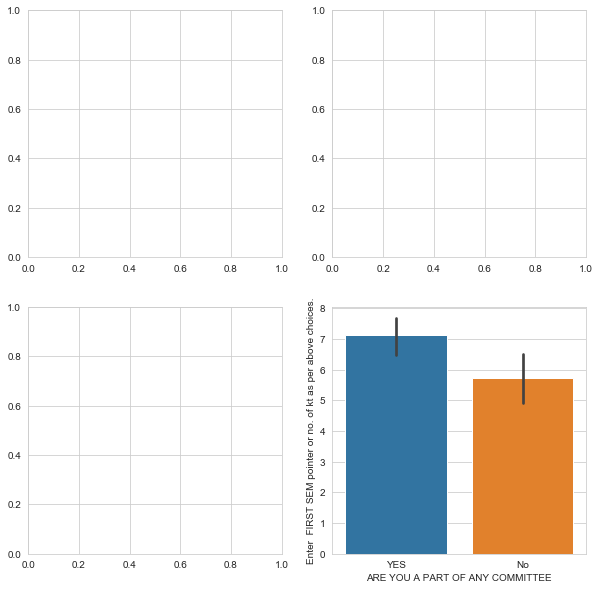

In [107]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='ARE YOU A PART OF ANY COMMITTEE', y='Enter  FIRST SEM pointer or no. of kt as per above choices.', data=data)

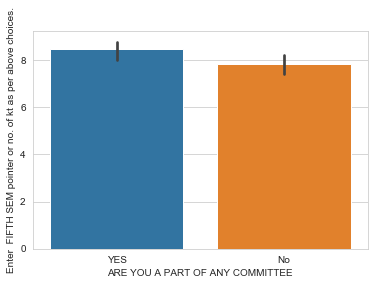

In [109]:

sns.barplot(x='First Semester status.3', y='Enter  FIFTH SEM pointer or no. of kt as per above choices.', data=data)

In [2]:
print('Percentage',data.First Semester status.value_counts(normalize=True))
data.First Semester status.value_counts(normalize=True).plot(kind='bar')

SyntaxError: invalid syntax (<ipython-input-2-c74a23b11ff3>, line 1)

In [7]:
sns.
barplot(x='ARE YOU A PART OF ANY COMMITTEE', y='Enter  FIRST SEM pointer or no. of kt as per above choices.', data=data)

SyntaxError: invalid syntax (<ipython-input-7-76e4cbda0bd8>, line 1)

In [8]:
sns.barplot(x='First Semester status.3', y='Enter  FIFTH SEM pointer or no. of kt as per above choices.', data=data)

NameError: name 'sns' is not defined

In [9]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='ARE YOU A PART OF ANY COMMITTEE', y='Enter  FIRST SEM pointer or no. of kt as per above choices.', data=data)

NameError: name 'plt' is not defined

In [10]:
print('Percentage',data.YEAR.value_counts(normalize=True))
data.YEAR.value_counts(normalize=True).plot(kind='bar')

NameError: name 'data' is not defined

In [11]:
data.isnull()

NameError: name 'data' is not defined

In [12]:
data = pd.read_csv(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')
# Any results you write to the current directory are saved as output.
data.head()

NameError: name 'pd' is not defined

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

In [16]:
data = pd.read_csv(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')
# Any results you write to the current directory are saved as output.
data.head()

,Timestamp,Email Address,FIRST NAME,LAST NAME,BRANCH,YEAR,First Semester status,Enter pointer / no. of kt,First Semester status.1,SECOND Semester status,...,Enter FOURTH SEM pointer or no. of kt as per above choices.,Enter FIFTH SEM pointer or no. of kt as per above choices.,Enter SIXTH SEM pointer or no. of kt as per above choices.,Enter SEVENTH SEM pointer or no. of kt as per above choices.,ARE YOU A PART OF ANY COMMITTEE,Please select the committee you are part of,Enter the Designations here,HAVE YOU WON ANY COMPETITIONS,ENTER THE TYPE OF COMPETITION,ENTER THE DETAILS
0,3/15/2019 15:59:48,sapatil655@gmail.com,Srushti,Devesh,INSTRU,BE,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,YES,Students Council,Dcs,Yes,CULTURAL COMPETITION,Singing
1,3/15/2019 16:04:14,sapatil655@gmail.com,Srushti,Ashok,EXTC,SE,NaN,NaN,SUCCESSFUL,SUCCESSFUL,...,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN
2,3/15/2019 16:05:08,sapatil655@gmail.com,Sanjeev,Sharma,INSTRU,TE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN
3,3/15/2019 16:05:59,sapatil655@gmail.com,Bakakak,Hsjsjs,CIVIL,FE,SUCCESSFUL,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,YES,Students Council,Zwc,No,NaN,NaN
4,3/15/2019 16:11:44,poojanayaka98@gmail.com,Pooja,Nayaka,COMPUTER,TE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,NaN


In [17]:
data.isnull()

,Timestamp,Email Address,FIRST NAME,LAST NAME,BRANCH,YEAR,First Semester status,Enter pointer / no. of kt,First Semester status.1,SECOND Semester status,...,Enter FOURTH SEM pointer or no. of kt as per above choices.,Enter FIFTH SEM pointer or no. of kt as per above choices.,Enter SIXTH SEM pointer or no. of kt as per above choices.,Enter SEVENTH SEM pointer or no. of kt as per above choices.,ARE YOU A PART OF ANY COMMITTEE,Please select the committee you are part of,Enter the Designations here,HAVE YOU WON ANY COMPETITIONS,ENTER THE TYPE OF COMPETITION,ENTER THE DETAILS
0,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,True,True,True,True,False,True,True,False,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,True,True,False,True,True
3,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,False,False,False,False,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,True,True,False,True,True
5,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,True,True,False,True,True
6,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,True,True,False,True,True
7,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,True,True,False,True,True
8,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True
9,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,False,False,False,False,True,True


C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



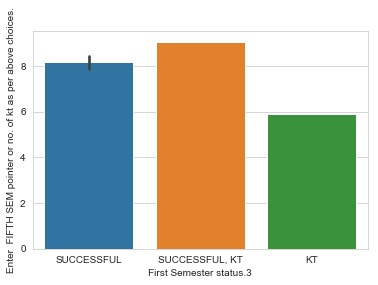

In [18]:
sns.barplot(x='First Semester status.3', y='Enter  FIFTH SEM pointer or no. of kt as per above choices.', data=data)

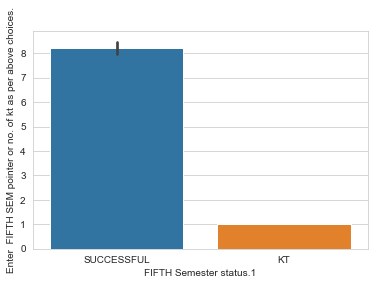

In [22]:
sns.barplot(x='FIFTH Semester status.1', y='Enter  FIFTH SEM pointer or no. of kt as per above choices.', data=data)

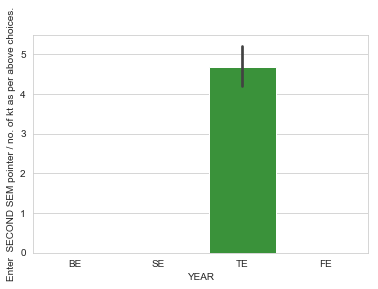

In [27]:
sns.barplot(x='YEAR', y='Enter  SECOND SEM pointer / no. of kt as per above choices.', data=data)

In [44]:


sns.lineplot(x='',y='Enter  FIRST SEM pointer /no. of kt   ',ax=ax)
plt.show()


ValueError: Could not interpret input 'FIRST NAME'

In [50]:
sns.lineplot(x='BRANCH', y='First Semester status.1', data=data)

ValueError: Could not interpret input 'BRANCH'

In [52]:
import pandas as pd

df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

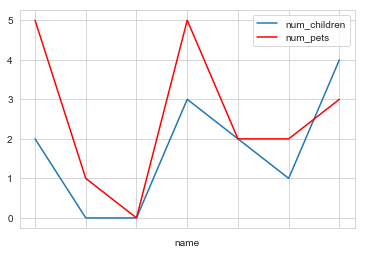

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
plt.show()


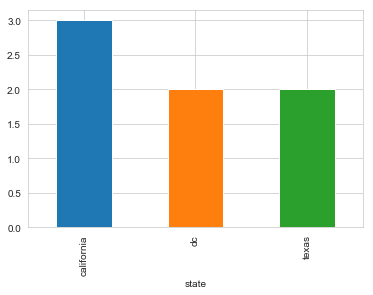

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()


In [1]:
>>> import csv
>>> with open('a') as f:
...     rows = csv.reader(f)
...     for row in rows:
...             print row[1]  # Only print the column in the row
.

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(row[1]  # Only print the column in the row)? (<ipython-input-1-2f4c2b6e59ff>, line 5)

In [2]:
State,Heart Disease rate,Stroke Death rate
Alabama,235.5,54.5


SyntaxError: invalid syntax (<ipython-input-2-359b5477abb9>, line 1)

In [7]:
>>> import csv
>>> with open(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv') as f:
    rows = csv.reader(f)
    for row in rows:          
     print (row[10])  



THIRD Semester status

SUCCESSFUL















SUCCESSFUL

SUCCESSFUL


SUCCESSFUL
SUCCESSFUL
SUCCESSFUL
SUCCESSFUL


SUCCESSFUL

KT













SUCCESSFUL
KT

KT


KT

SUCCESSFUL


SUCCESSFUL

KT
KT



KT

SUCCESSFUL
SUCCESSFUL
SUCCESSFUL

SUCCESSFUL



UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 6566: character maps to <undefined>

In [36]:
import csv

with open(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv') as csvFile:
    reader = csv.reader(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')
    
        
    data = [row for row in csv.reader(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')]
    print (data[4][4])

csvFile.close()

IndexError: list index out of range

In [57]:
    ifile  = open(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv', "r")
    reader = csv.reader(ifile)
   
    numline=len(open(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv'[(namecount).readlines()]))
    
    rownum = 0
    for row in reader:
        rownum+=1
        for col in row:
            if rownum == (numline-40):
                p1 =(col)
            if rownum == numline:
                p2 =(col)
 
    ifile.close()



NameError: name 'namecount' is not defined

In [72]:
import pandas as pd
data = pd.read_csv(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')

# Slice the result for first 5 rows

print (data.loc[[5],['LAST NAME','YEAR','FIRST NAME']])


  LAST NAME YEAR FIRST NAME
5    Dhanve   TE     Pankaj


In [81]:
import pandas as pd

df = pd.DataFrame({'name':[(data.loc[[6],['Enter  FIRST SEM pointer or no. of kt as per above choices.',
                                          'Enter  SECOND SEM pointer or no. of kt as per above choices.',
                                          'Enter  THIRD SEM pointer or no. of kt as per above choices.',
                                          
                                          'Enter  FIFTH SEM pointer or no. of kt as per above choices.']])],
                   'gender':['1','2','3','4','5']})

ValueError: arrays must all be same length

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)
plt.show()


KeyError: 'num_children'

In [90]:
import pandas as pd

df = pd.DataFrame({'name':[(data.loc[[7],['Enter  FIRST SEM pointer or no. of kt as per above choices.',
                                          'Enter  SECOND SEM pointer or no. of kt as per above choices.',
                                          'Enter  THIRD SEM pointer or no. of kt as per above choices.',
                                          'Enter  FOURTH SEM pointer or no. of kt as per above choices.']])],
                   'H':['1','2','3','4']})

ValueError: arrays must all be same length

In [100]:

import pandas as pd
data = pd.read_csv(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')
df = pd.DataFrame({'name':[(data.loc[[6],['Enter  FIRST SEM pointer /no. of kt as per above choices.',
                                          'Enter  SECOND SEM pointer or no. of kt as per above choices.',
                                          'Enter  THIRD SEM pointer or no. of kt as per above choices.',
                                          'Enter  FOURTH SEM pointer or no. of kt as per above choices.',
                                          'Enter  FIFTH SEM pointer or no. of kt as per above choices.']])],
                   'num_pets':[5,1,0,5,2],})

























ValueError: arrays must all be same length

TypeError: Empty 'DataFrame': no numeric data to plot

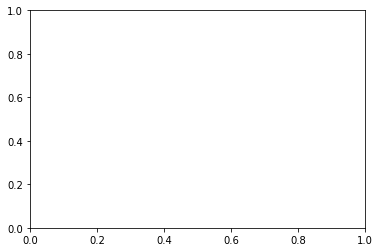

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x=y='name',ax=ax)

plt.show()


In [101]:













import pandas as pd
data = pd.read_csv(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')
df = pd.DataFrame({'name':[(data.loc[[6],['Enter  FIRST SEM pointer /no. of kt as per above choices.',
                                          'Enter  SECOND SEM pointer or no. of kt as per above choices.',
                                          'Enter  THIRD SEM pointer or no. of kt as per above choices.',
                                          'Enter  FOURTH SEM pointer or no. of kt as per above choices.',
                                          'Enter  FIFTH SEM pointer or no. of kt as per above choices.']])],
                   'num_pets':[5,1,0,5,2],})



ValueError: arrays must all be same length

In [102]:
import pandas as pd
data = pd.read_csv(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')

# Slice the result for first 5 rows

print (data.loc[[5],['LAST NAME','YEAR','FIRST NAME']])


  LAST NAME YEAR FIRST NAME
5    Dhanve   TE     Pankaj


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')

df = pd.DataFrame({'name':[(data.loc[[6],['Enter  FIRST SEM pointer /no. of kt as per above choices.',
                                          'Enter  SECOND SEM pointer or no. of kt as per above choices.',
                                          'Enter  THIRD SEM pointer or no. of kt as per above choices.',
                                          'Enter  FOURTH SEM pointer or no. of kt as per above choices.',
                                          'Enter  FIFTH SEM pointer or no. of kt as per above choices.']])],
                 'abc':[(data.loc[[6],['YEAR','YEAR','YEAR',
                                          'YEAR',
                                          'YEAR']]),'h':[(data.loc[[6],['Enter  FIRST SEM pointer /no. of kt as per above choices.',
                                          'Enter  SECOND SEM pointer or no. of kt as per above choices.',
                                          'Enter  THIRD SEM pointer or no. of kt as per above choices.',
                                          'Enter  FOURTH SEM pointer or no. of kt as per above choices.',
                                          'Enter  FIFTH SEM pointer or no. of kt as per above choices.']])],
]})

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='h',ax=ax)

plt.show()


SyntaxError: invalid syntax (<ipython-input-110-095d2bfe27ab>, line 12)

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')
a=(data.loc[6],['Enter  FIRST SEM pointer /no. of kt as per above choices.'])
df = pd.DataFrame({'name':[(data.loc[[6],[a]])],
                 'abc':[(data.loc[[6],['YEAR',
                                          ]])],
                  'h':[(data.loc[[6],['Enter  FIRST SEM pointer /no. of kt as per above choices.',
                                          'Enter  SECOND SEM pointer or no. of kt as per above choices.',
                                          'Enter  THIRD SEM pointer or no. of kt as per above choices.',
                                          'Enter  FOURTH SEM pointer or no. of kt as per above choices.',
                                          'Enter  FIFTH SEM pointer or no. of kt as per above choices.']])],
})

print (a)

TypeError: 'Series' objects are mutable, thus they cannot be hashed

KeyError: 'name'

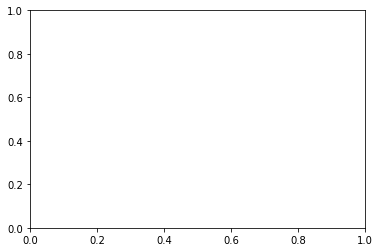

In [124]:
import matplotlib.pyplot as plt
ax = plt.gca()

df.plot(kind='line',x='name',y='name',ax=ax)

plt.show()


In [118]:
print (data.loc[[6],['Enter  FIRST SEM pointer /no. of kt as per above choices.',
                                          ]])

   Enter  FIRST SEM pointer /no. of kt as per above choices.
6                                               7.22        


TypeError: Empty 'DataFrame': no numeric data to plot

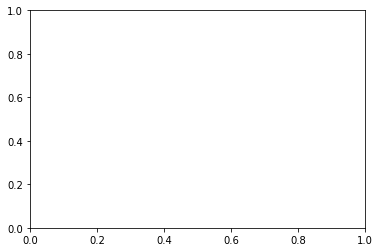

In [120]:
import matplotlib.pyplot as plt
ax = plt.gca()

df.plot(kind='line',x='abc',y='name',ax=ax)

plt.show()

In [131]:
b=(data.loc[[6],['Enter  FIRST SEM pointer /no. of kt as per above choices.',
                                          ]])
print (b)

   Enter  FIRST SEM pointer /no. of kt as per above choices.
6                                               7.22        


   Enter  FIRST SEM pointer /no. of kt as per above choices.
6                                               7.22        


ValueError: Must pass DataFrame with boolean values only

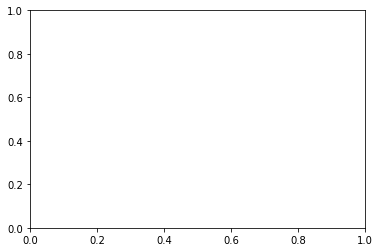

In [139]:
import matplotlib.pyplot as plt
ax = plt.gca()
b=(data.loc[[6],['Enter  FIRST SEM pointer /no. of kt as per above choices.',
                                          ]])
print (b)
df.plot(kind='line',x=b,y=1)

plt.show()


In [153]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
b=(data.loc[[6],['Enter  FIRST SEM pointer /no. of kt as per above choices.' ]])
sns.barplot(x=(data.loc[[6],['Enter  FIRST SEM pointer /no. of kt as per above choices.']]), y='YEAR',data=data)

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [1]:
#!/usr/bin/python

import Tkinter
top = Tkinter.Tk()
# Code to add widgets will go here...
top.mainloop()
w = Checkbutton ( master, option, ... )

ModuleNotFoundError: No module named 'Tkinter'

C:\Users\dell\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Text(value='', description='Domain to ping')

<IPython.core.display.Javascript object>


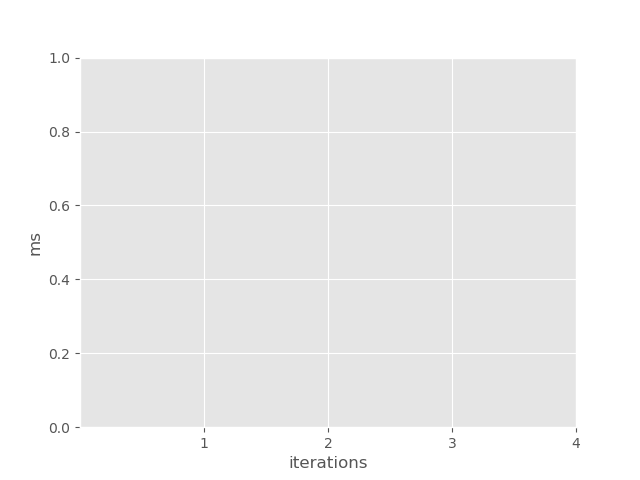

HBox()

Domain gave error on pinging


In [3]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')
 
NUMBER_OF_PINGS = 4
 
# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)
 
# preparing the plot 
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()
 
# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)
 
# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")
 
# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print ("Domain gave error on pinging")
    else:
         # rebuild plot based on ping result
        data = hits
        data = data.astype(float)
        plots, = ax.plot(x, data, label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)
 
# function to deal with the checkbox update button       
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots.set_visible(False)
        else:
            plots.set_visible(True)
    plt.legend()
    plt.draw()
 
button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()

In [37]:
from ipywidgets import interact
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv')
 
def my_function(x):
    return x
    
# create a slider
interact(my_function, x=20)
with open(r'C:\Users\dell\Downloads\NEW STUDENT DETAILS (Responses) - Form Responses 1.csv') as f:
     rows = csv.reader(f)
     for row in rows:   
        x=[row[3]]
        interact(my_function,x)



interactive(children=(IntSlider(value=20, description='x', max=60, min=-20), Output()), _dom_classes=('widget-…

TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given